Import libraries and declare program constants

In [30]:
import sys
import os
import time
import argparse
import matplotlib.pyplot as plt
from numpy import double


#-----------------------import libraries for Spectrum analyzer----------------#
sys.path.insert(0, os.path.abspath(os.path.join('..') + '/scripts/spec_ana/'))
from sa_fsh8_read_noise_power_density import SA_SOCK        # Import the Spectrum Analyser Socket Function
from sa_fsh8_read_noise_power_density import pow_values
from sa_fsh8_read_noise_power_density import freq_values

# -----------------Connection Settings----------------------
SA_HOST = '10.8.88.138'             # fsh8 spectrum analyzer IP temporary
SA_PORT = 5555                      # fsh8 spectrum analyzer port 18? 23?
SA_ADDRESS = (SA_HOST, SA_PORT)
#-----------------------------------------------------------
# ----------------Initialization of Variables---------------    
DEFAULT_TIMEOUT = 1        # Default socket timeout
RF_OFF = 0
RF_ON = 1

# -----------------SA INITIALIZATION-----------------

#-----------------SA_FSH8 initialization Variables----------
NUMPOINTS = 631   # Number of measurement points (Max=625)

Input test parameters

In [31]:
freq_start = 0  # the start frequency of the spectrum analyzer (Hz) e.g. 100000000 or 100e6, integer with no units [100 MHz, minimum 9 kHz]
freq_stop = 6e9 # the stop frequency of the spectrum analyzer (Hz) e.g. 2000000000 or 2e9, integer with no units [2 GHz, maximum 8 GHz]
res_bw = 3e6    # the resolution bandwidth of the spectrum analyzer (Hz) e.g. 3000000 or 3e6, integer with no units [3 MHz]
vid_bw = 3e2     # the video bandwidth of the spectrum analyzer (Hz) e.g. 300, integer with no units [30 Hz]
marker_freq = 3e9  # the frequency of interest on the spectrum analyzer (Hz) e.g. 10000000 or 10e6, integer with no units [10 MHz, minimum 9 kHz, maximum 8 GHz]')


Setup the setup the Spectrum Analyzer

In [32]:
#------------------------SA_FSH8 Setup-------------------------#
def setupSA():
    print('/------Setup spectrum analyser---------/')
    specAnal = SA_SOCK()
    specAnal.connectSpecAna((SA_ADDRESS))
    specAnal.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)
    #rbw = res_bw         # Resolution BW of spectrum analyser
    #vbw = vid_bw        # Video BW of spectrum analyser
    specAnal.setSpecAnaBandwidth('off', res_bw, 'off', vid_bw) # Set the SA Resolution bandwidth mode to Manual, 100 KHz. Set the Video BW to Manual, 100 KHz 
    specAnal.setSpecAnaAmplitude(-25, 5) 
    specAnal.setSpecAnaDetector('rms')
    specAnal.setSpecAnaSweepTime('15s')
    specAnal.setMarkerFunction(marker_freq)
    print(f'Frequency of Interest = {marker_freq/1e9} GHz')
    print('/------End of Setup Spectrum Analyzer---------/')
    return specAnal
        

In [33]:
#------------------------------ PLOT ---------------------------#
def plotTrace(x_axis, y_axis, x_label, y_label, title, label): 
    ''' Plot response

    This function plots the power vs frequency filter response 

    @params:    
        freq_values: integer list [in Hz]
        power_value: integer list [in dBm]
    '''
    plt.figure(figsize=(10,10))
    plt.plot(x_axis, y_axis, 'r', label = label)
    plt.legend()
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    #plt.ylim(ymax=y_max) 
    plt.ylim(ymin=-80) 
    plt.title(title, fontsize = 16)
    plt.grid()
    plt.show()

In [34]:
print('/--------- Running main Code ---------/') 
time.sleep(1) 
SpecAna = setupSA()
time.sleep(1) 
run_time_delay = float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()) * float(10)
print(f'run_time_delay = {run_time_delay}')
for count in range(0, int(run_time_delay), 10):
    time.sleep(1)          # wait for sweep to complete  
    print(f'count = {count}...')
noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
print('Power and Frequency Values acquired.')

/--------- Running main Code ---------/
/------Setup spectrum analyser---------/
Connected to: b'Rohde&Schwarz,FSH8,106260/028,V3.30'
SA Start Freq: 0.0 MHz, Stop Freq: 6000.0 MHz, Points: 631
SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
SA amplitude reference level set to REF -25.0 dBm
SA input attenuator set to 5.0 dB
SA trace mode set to = WRIT
SA detector mode set to = RMS
Frequency of Interest = 3.0 GHz
/------End of Setup Spectrum Analyzer---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Power and Frequency Values acquired.


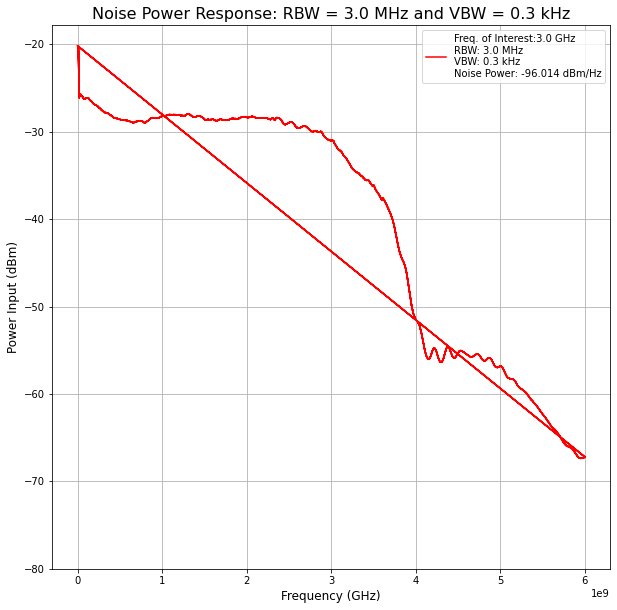

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW:0.3 kHz
	Noise Power: -96.014 dBm/Hz
End of program.


In [35]:
# Plot the results
plotTrace(freq_values, pow_values, 'Frequency (GHz)', 'Power Input (dBm)', f'Noise Power Response: RBW = {res_bw/1e6} MHz and VBW = {vid_bw/1e3} kHz', f'Freq. of Interest:{marker_freq/1e9} GHz\nRBW: {res_bw/1e6} MHz\nVBW: {vid_bw/1e3} kHz\nNoise Power: {noise_dbm_hz} dBm/Hz')
print(f'Noise Power Density with:\n\tResolution BW: {res_bw/1e6} MHz\n\tVideo BW:{vid_bw/1e3} kHz\n\tNoise Power: {noise_dbm_hz} dBm/Hz')
print('End of program.')

In [36]:
res_bw = [1e6, 3e6, 5e6]  # the resolution bandwidth of the spectrum analyzer (Hz) e.g. 3000000 or 3e6, integer with no units [3 MHz]
vid_bw = [3e2, 10e2, 30e2] # the video bandwidth of the spectrum analyzer (Hz) e.g. 30, integer with no units [30 Hz]   
marker_freq = [10e6, 1.5e9, 3e9] # the frequency of interest on the spectrum analyzer (Hz) e.g. 10000000 or 10e6, integer with no units [10 MHz, minimum 9 kHz, maximum 8 GHz]')
freq_start = 0            
freq_stop = 6e9


SA trace mode set to = WRIT
SA detector mode set to = RMS
SA Start Freq: 0.0 MHz, Stop Freq: 6000.0 MHz, Points: 631
SA amplitude reference level set to REF -25.0 dBm
SA input attenuator set to 5.0 dB
SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
Testing with RBW = 1.0 MHz and VBW = 0.3 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


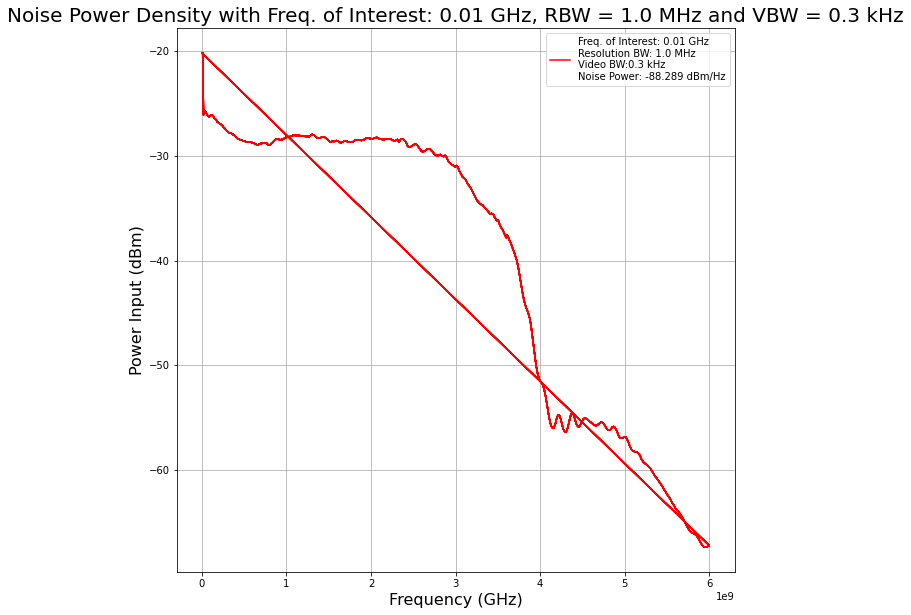

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -88.289 dBm/Hz




Frequency of Interest: 1.5 GHz


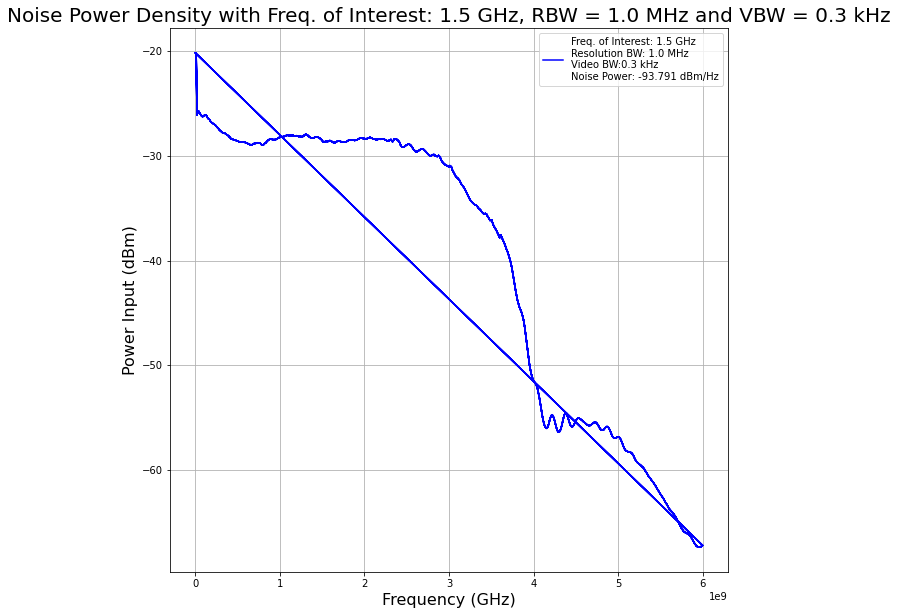

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -93.791 dBm/Hz




Frequency of Interest: 3.0 GHz


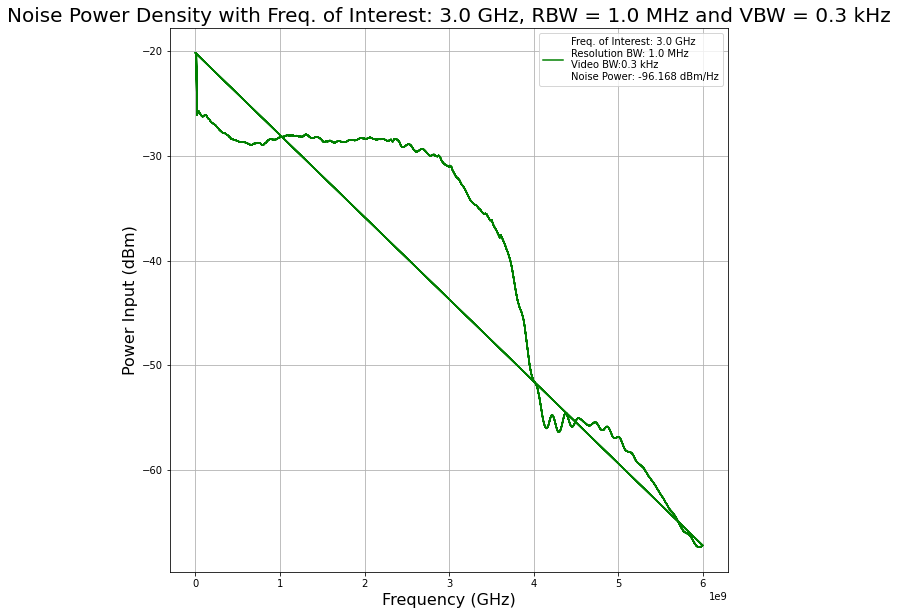

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -96.168 dBm/Hz




SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 1.0 kHz
Testing with RBW = 1.0 MHz and VBW = 1.0 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


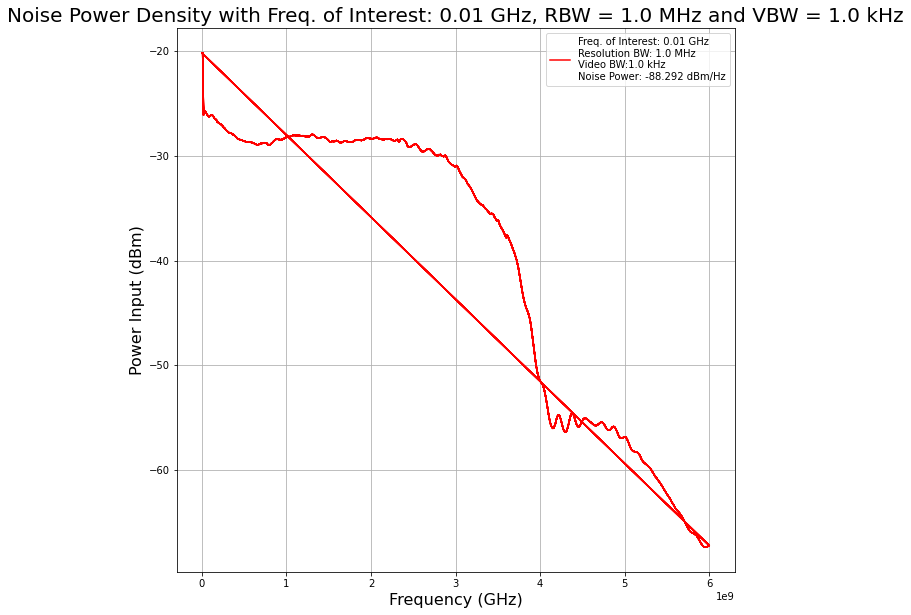

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -88.292 dBm/Hz




Frequency of Interest: 1.5 GHz


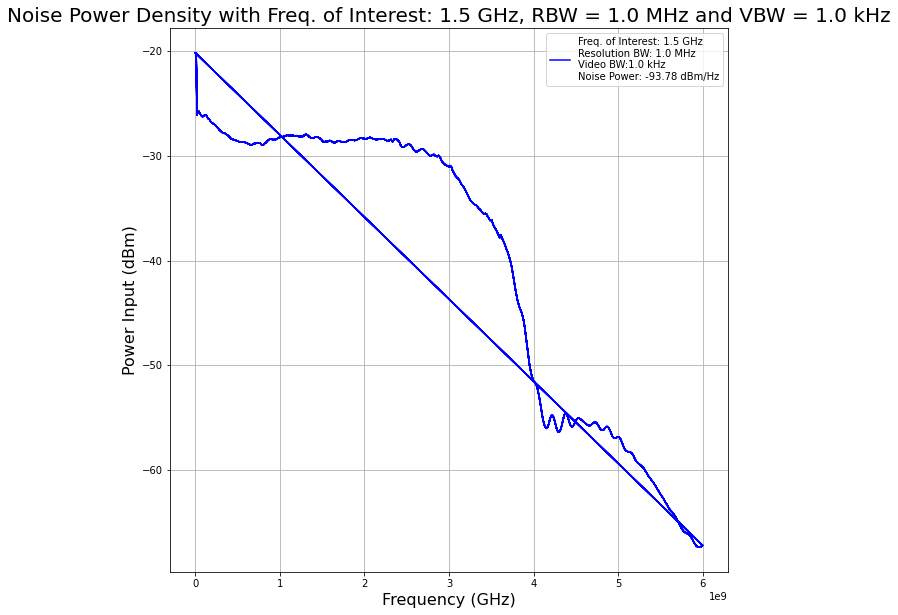

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -93.78 dBm/Hz




Frequency of Interest: 3.0 GHz


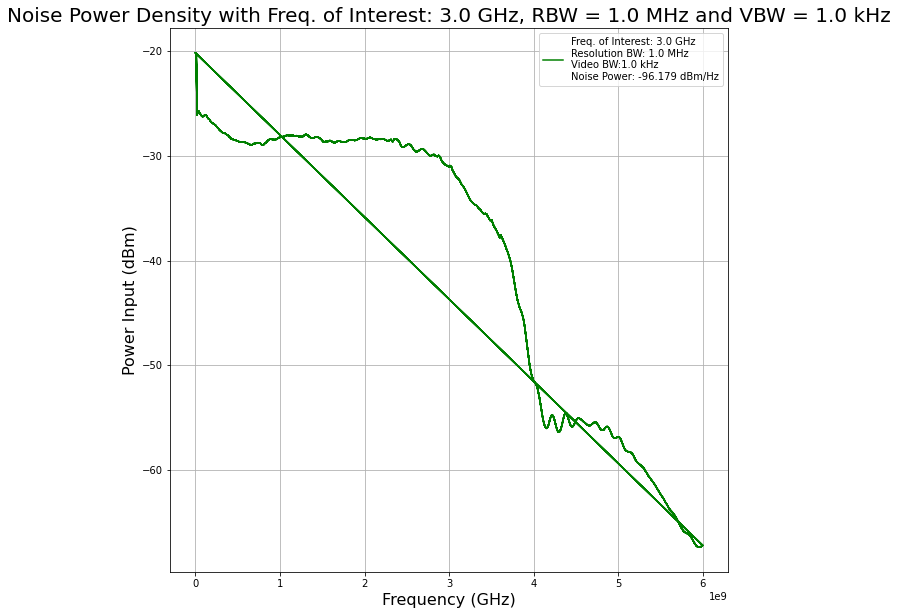

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -96.179 dBm/Hz




SA RBW set to AUTO 0, RBW = 1000.0 kHz
SA VBW set to AUTO 0, VBW = 3.0 kHz
Testing with RBW = 1.0 MHz and VBW = 3.0 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


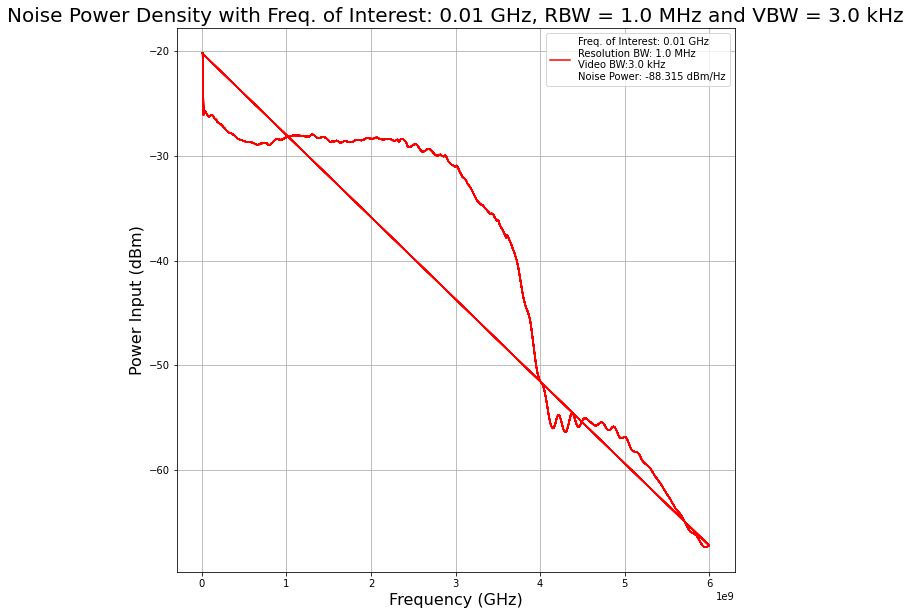

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -88.315 dBm/Hz




Frequency of Interest: 1.5 GHz


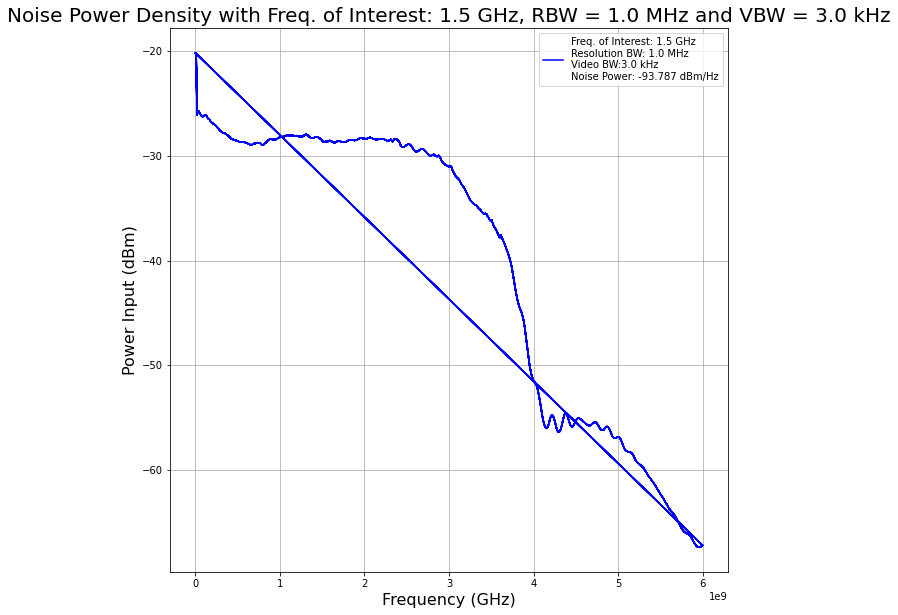

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -93.787 dBm/Hz




Frequency of Interest: 3.0 GHz


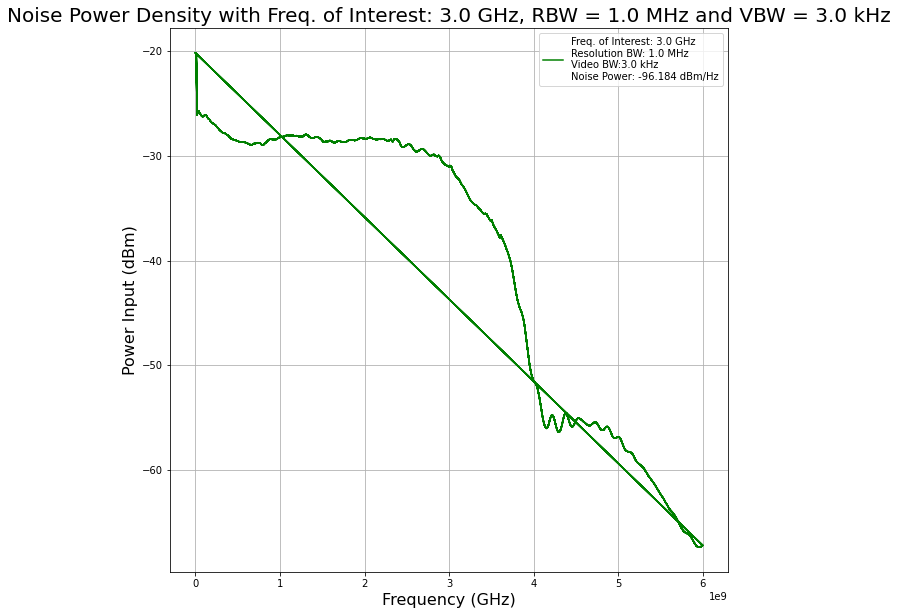

Noise Power Density with:
	Resolution BW: 1.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -96.184 dBm/Hz




SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
Testing with RBW = 3.0 MHz and VBW = 0.3 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


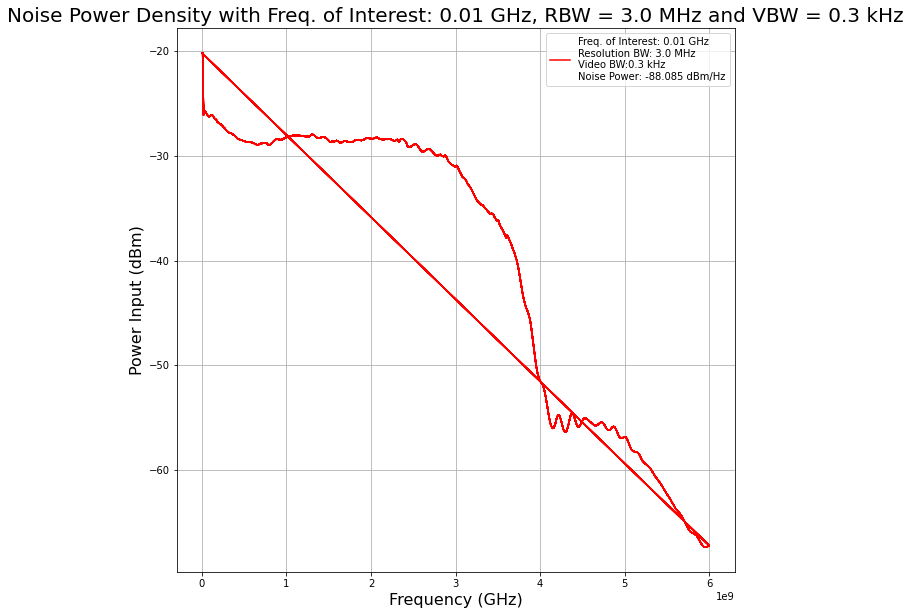

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -88.085 dBm/Hz




Frequency of Interest: 1.5 GHz


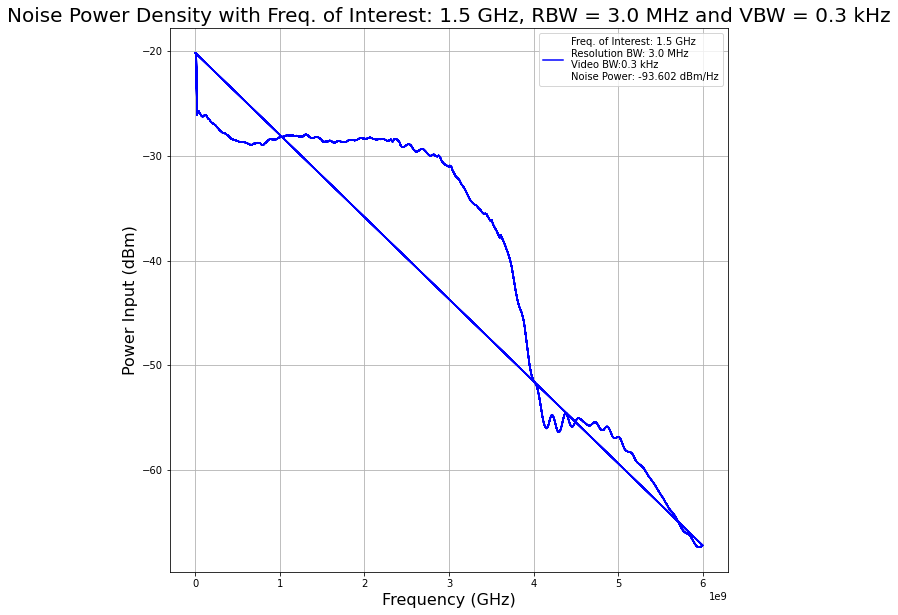

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -93.602 dBm/Hz




Frequency of Interest: 3.0 GHz


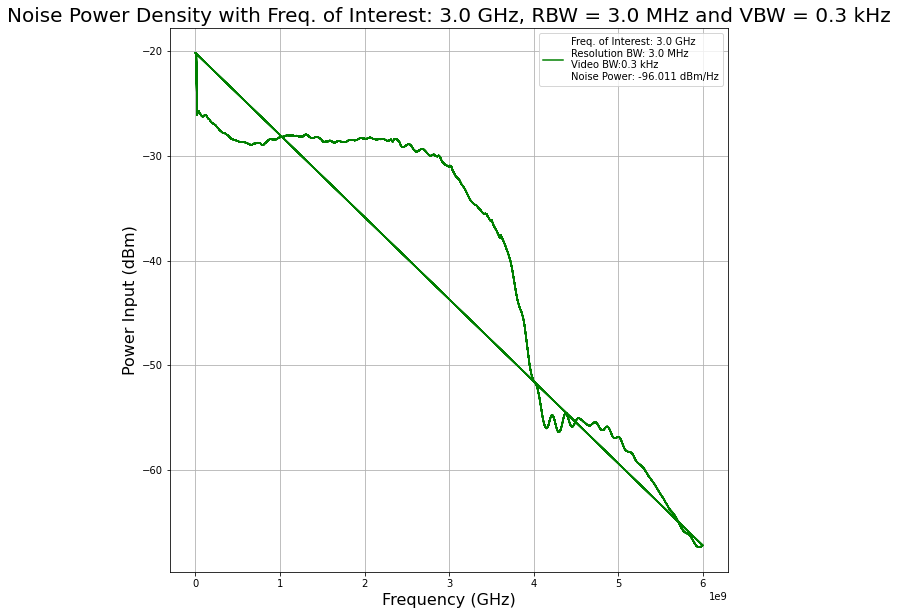

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -96.011 dBm/Hz




SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 1.0 kHz
Testing with RBW = 3.0 MHz and VBW = 1.0 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


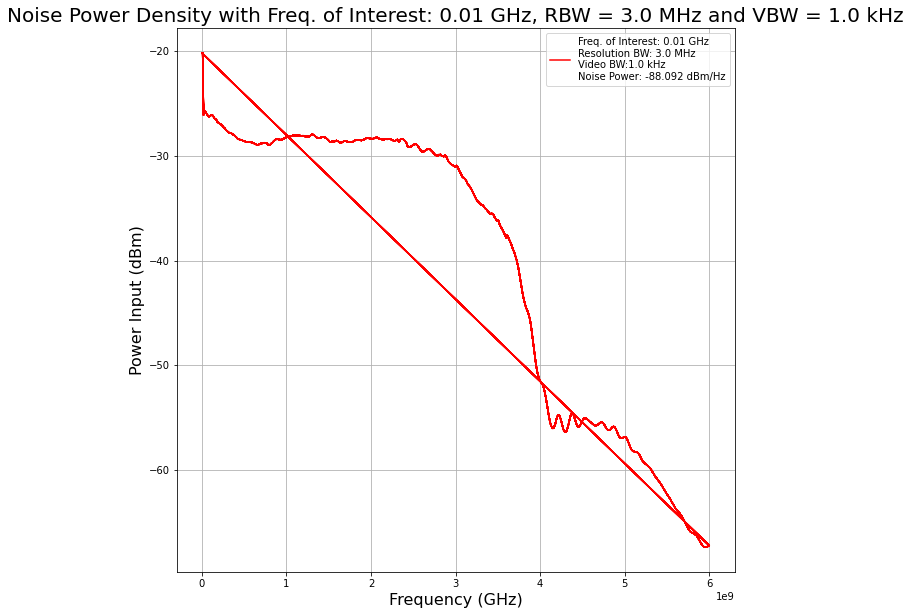

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -88.092 dBm/Hz




Frequency of Interest: 1.5 GHz


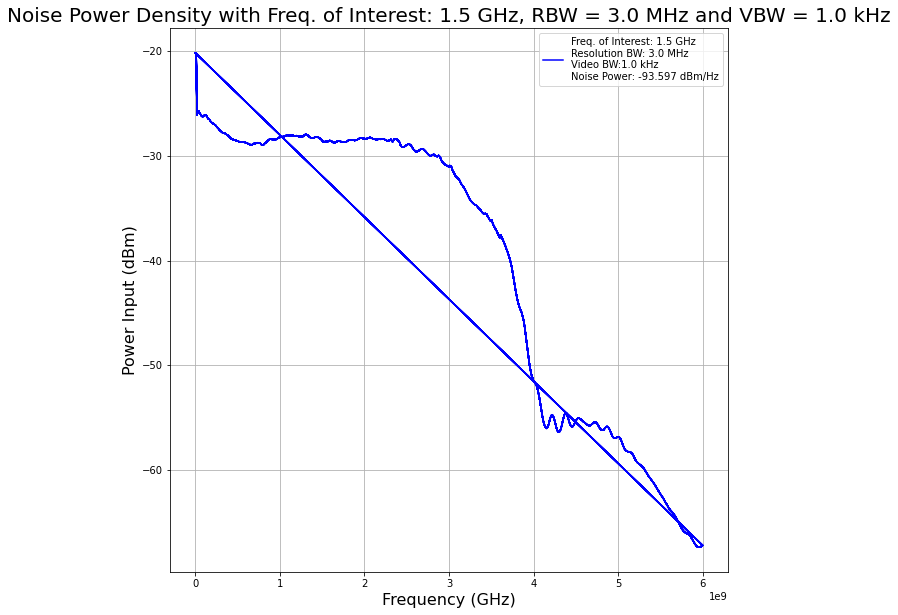

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -93.597 dBm/Hz




Frequency of Interest: 3.0 GHz


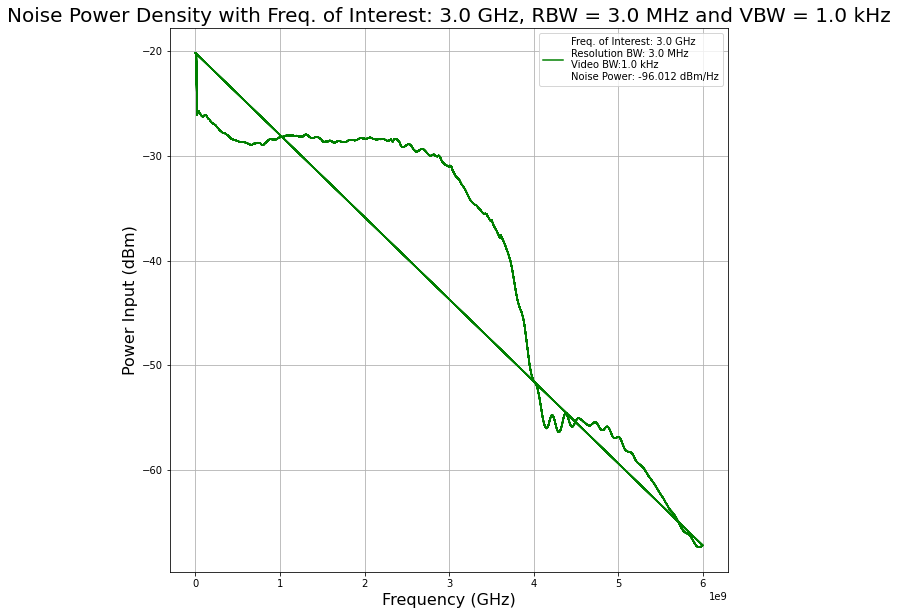

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -96.012 dBm/Hz




SA RBW set to AUTO 0, RBW = 3000.0 kHz
SA VBW set to AUTO 0, VBW = 3.0 kHz
Testing with RBW = 3.0 MHz and VBW = 3.0 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


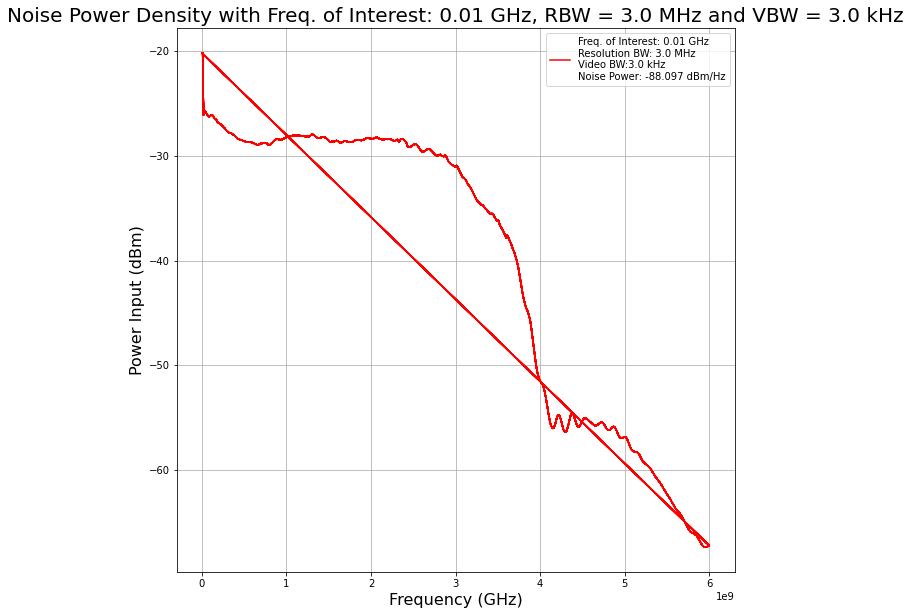

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -88.097 dBm/Hz




Frequency of Interest: 1.5 GHz


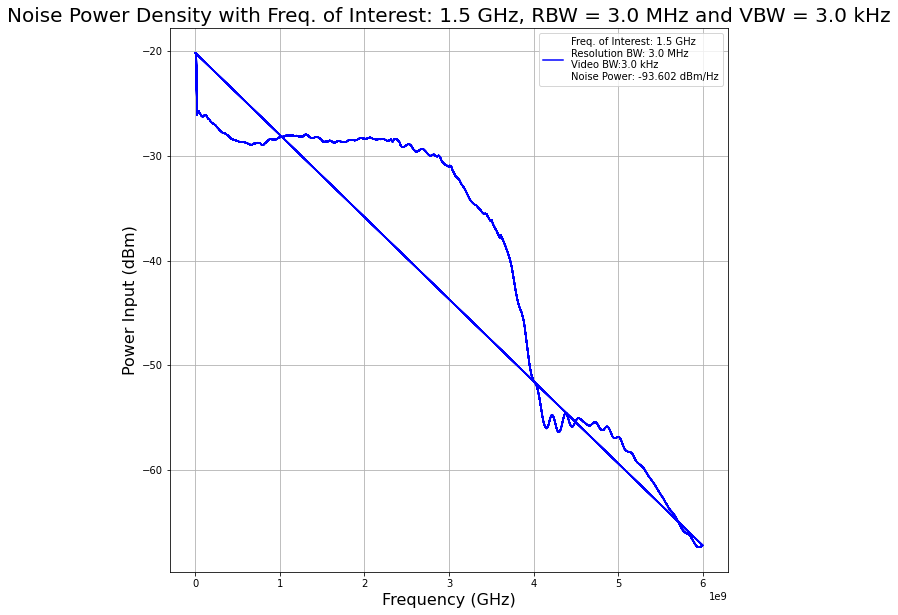

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -93.602 dBm/Hz




Frequency of Interest: 3.0 GHz


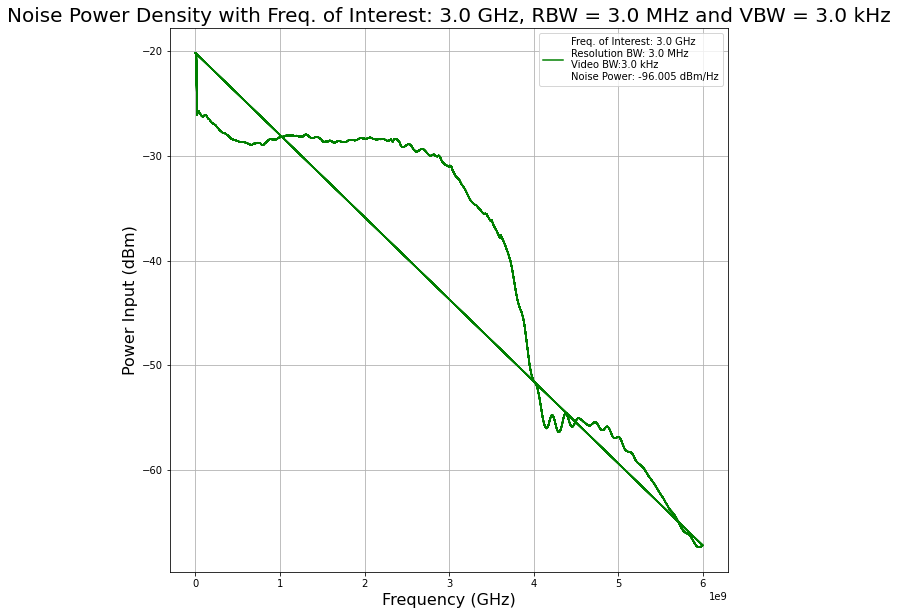

Noise Power Density with:
	Resolution BW: 3.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -96.005 dBm/Hz




SA RBW set to AUTO 0, RBW = 5000.0 kHz
SA VBW set to AUTO 0, VBW = 0.3 kHz
Testing with RBW = 5.0 MHz and VBW = 0.3 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


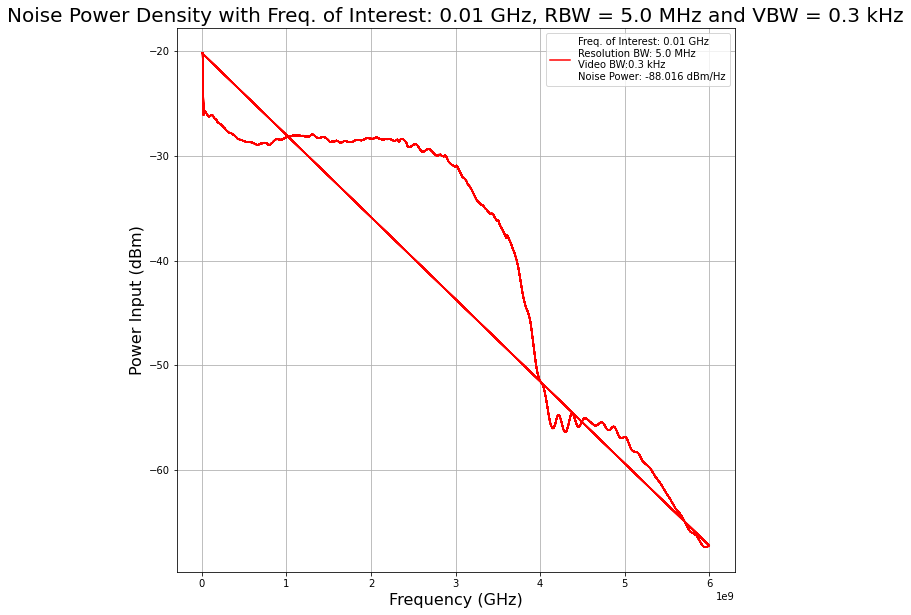

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -88.016 dBm/Hz




Frequency of Interest: 1.5 GHz


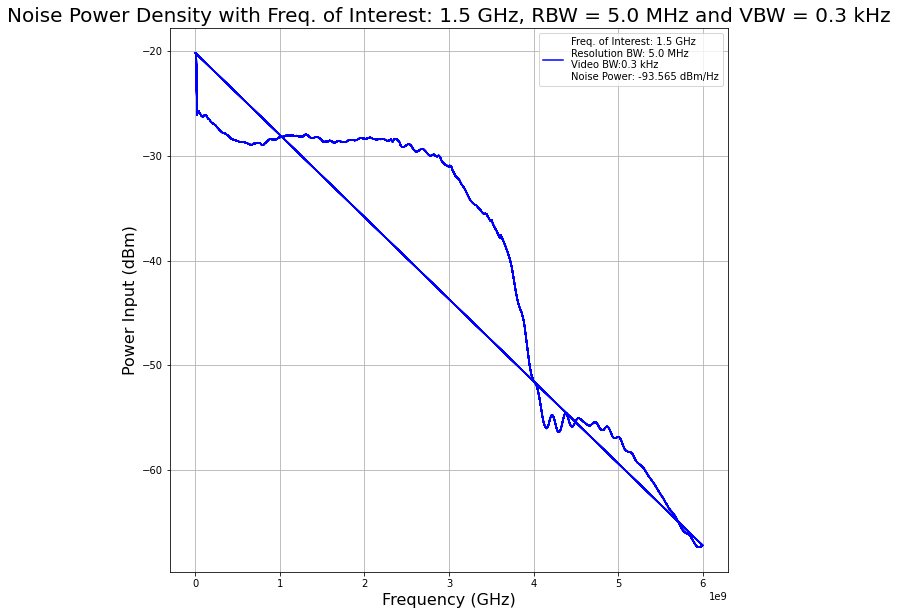

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -93.565 dBm/Hz




Frequency of Interest: 3.0 GHz


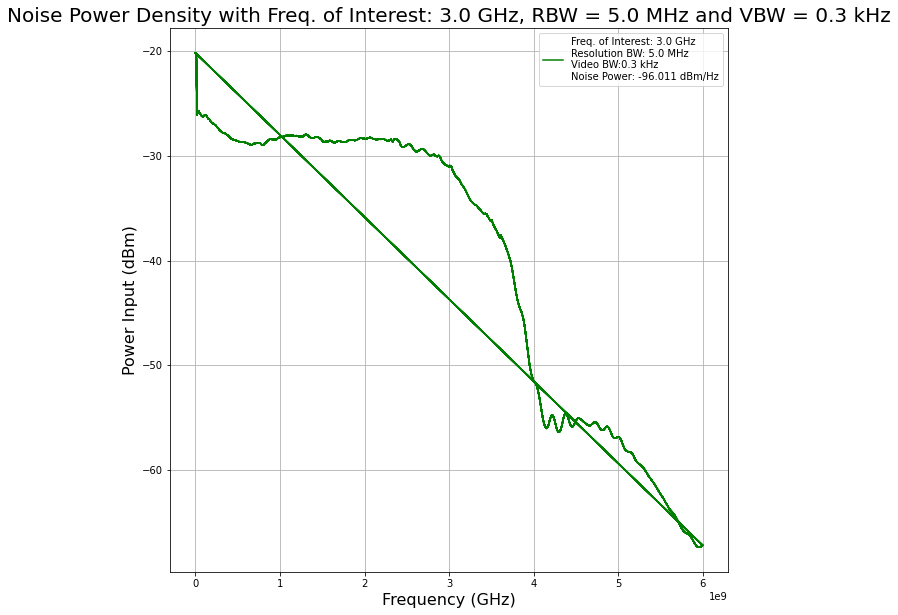

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 0.3 kHz
	Noise Power: -96.011 dBm/Hz




SA RBW set to AUTO 0, RBW = 5000.0 kHz
SA VBW set to AUTO 0, VBW = 1.0 kHz
Testing with RBW = 5.0 MHz and VBW = 1.0 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


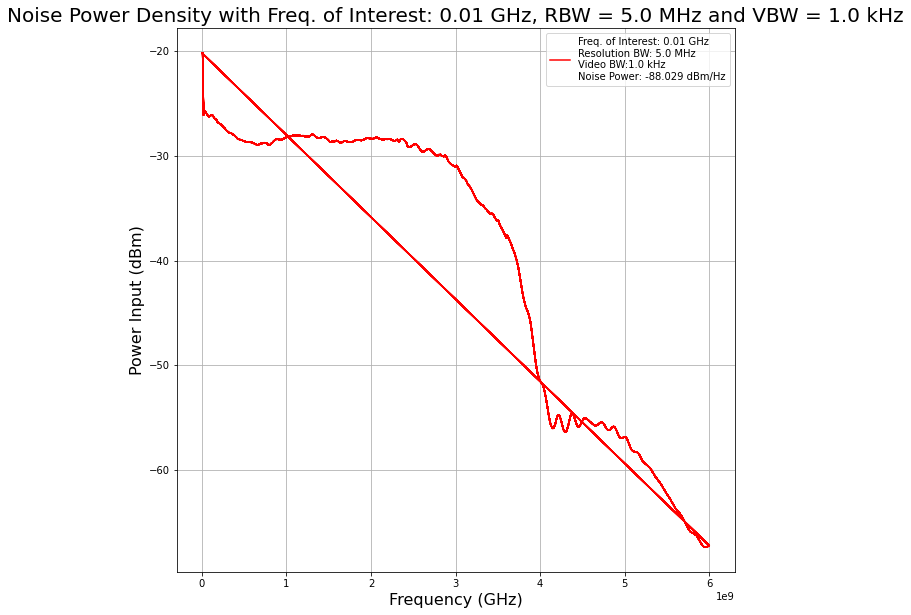

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -88.029 dBm/Hz




Frequency of Interest: 1.5 GHz


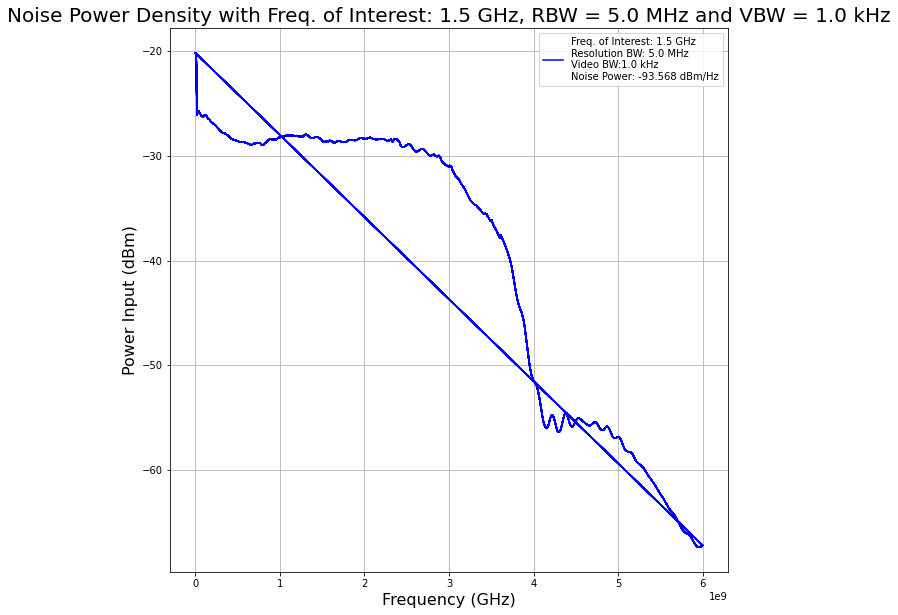

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -93.568 dBm/Hz




Frequency of Interest: 3.0 GHz


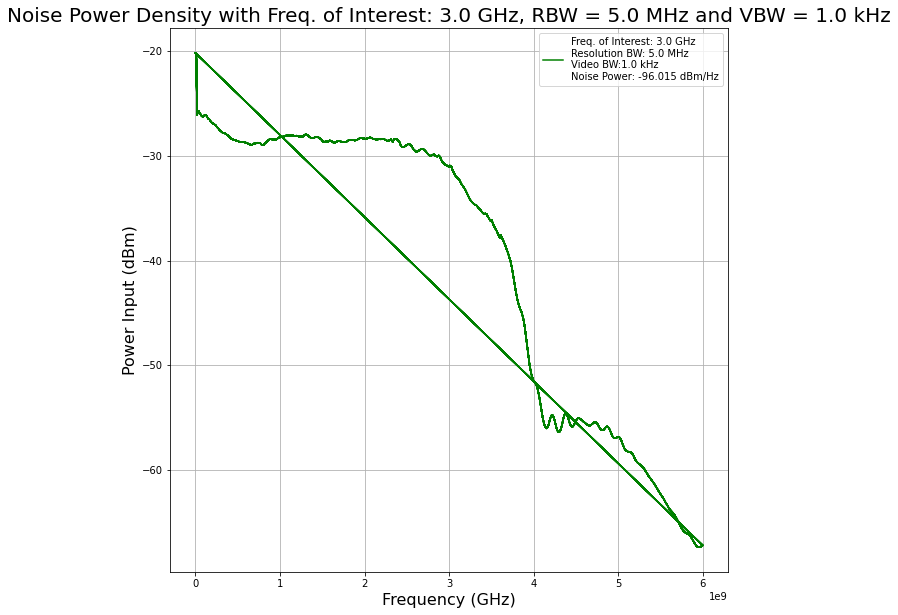

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 1.0 kHz
	Noise Power: -96.015 dBm/Hz




SA RBW set to AUTO 0, RBW = 5000.0 kHz
SA VBW set to AUTO 0, VBW = 3.0 kHz
Testing with RBW = 5.0 MHz and VBW = 3.0 kHz
/--------- Running main Code ---------/
run_time_delay = 150.0
count = 0...
count = 10...
count = 20...
count = 30...
count = 40...
count = 50...
count = 60...
count = 70...
count = 80...
count = 90...
count = 100...
count = 110...
count = 120...
count = 130...
count = 140...
No of Sweep Points = 631
Frequency of Interest: 0.01 GHz


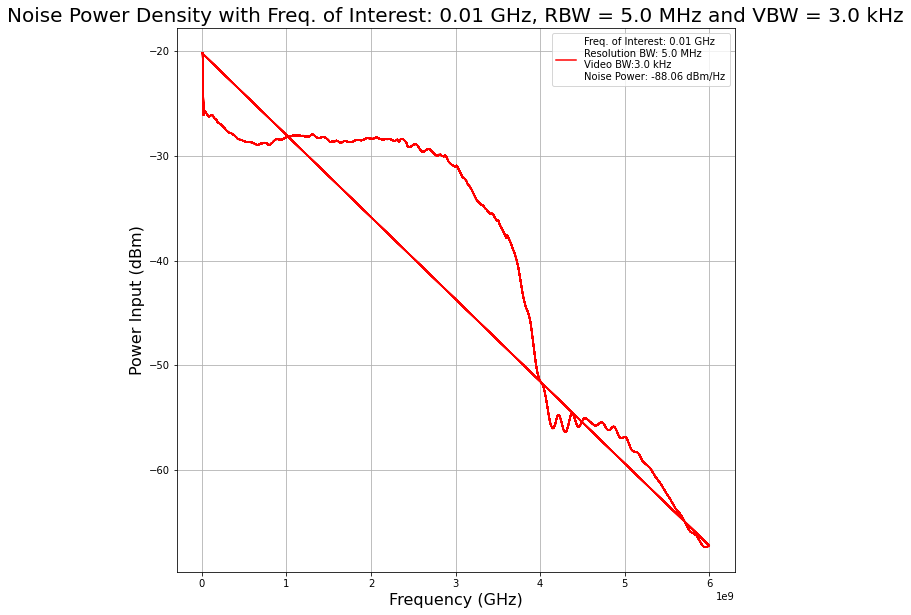

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -88.06 dBm/Hz




Frequency of Interest: 1.5 GHz


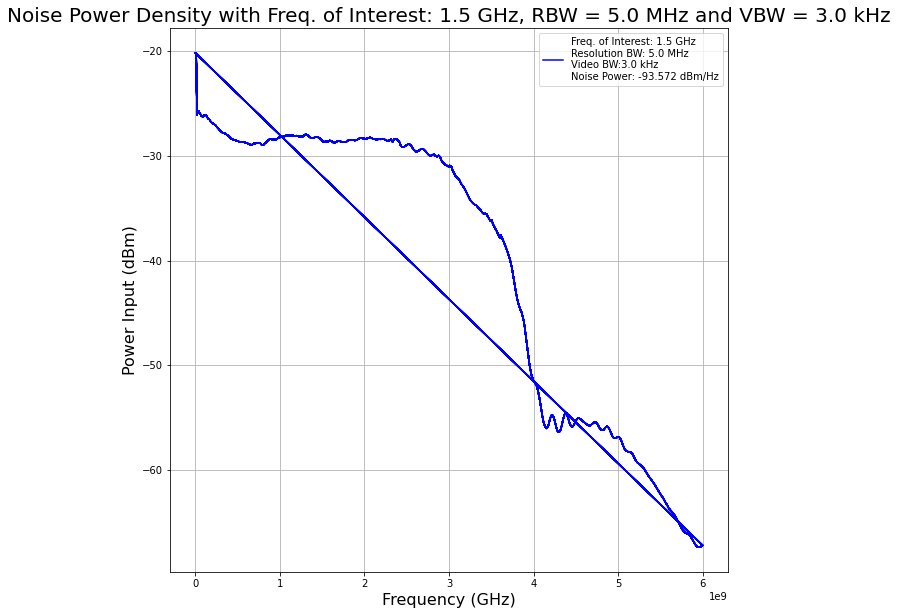

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -93.572 dBm/Hz




Frequency of Interest: 3.0 GHz


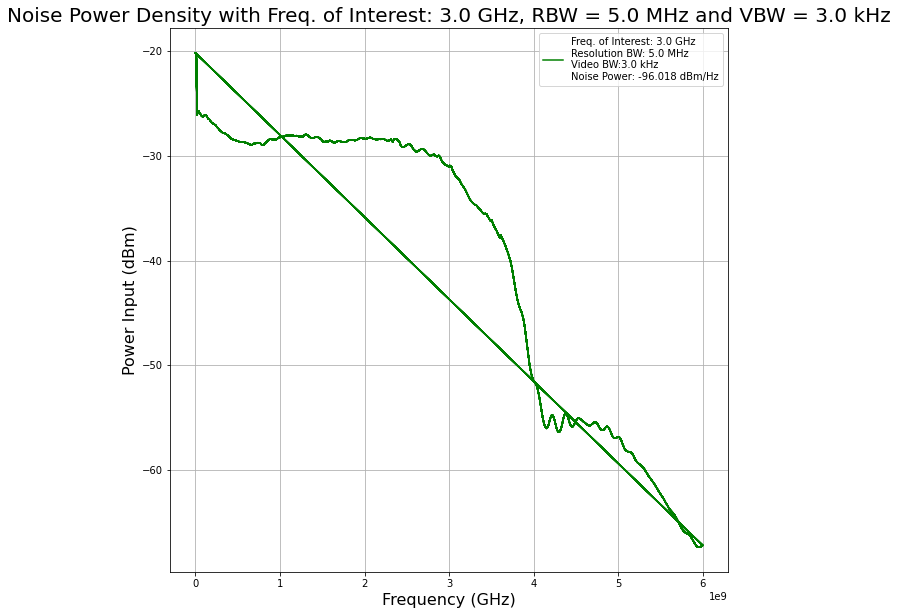

Noise Power Density with:
	Resolution BW: 5.0 MHz
	Video BW: 3.0 kHz
	Noise Power: -96.018 dBm/Hz




End of program.


In [37]:
SpecAna.setSpecAnaDetector('rms')                           # Switch on rms detector
SpecAna.setSpecAnaSweep(freq_start, freq_stop, NUMPOINTS)   # Set spectrum analyzer span
SpecAna.setSpecAnaAmplitude(-25, 5)                         # Set ref level and attenuator
SpecAna.setSpecAnaSweepTime('15s')                          # Set spectrum analyzer sweep
for j in res_bw:
    for k in vid_bw:
        SpecAna.setSpecAnaBandwidth('off', j, 'off', k)
        print(f'Testing with RBW = {j/1e6} MHz and VBW = {k/1e3} kHz')
        print('/--------- Running main Code ---------/') 
        time.sleep(1) 
        
        # Read sweep time to wait for trace to complete
        run_time_delay = float(SpecAna.requestSpecAnaData('SWE:TIME?').decode()) * float(10)
        print(f'run_time_delay = {run_time_delay}')
        for count in range(0, int(run_time_delay), 10):
            time.sleep(1)          
            print(f'count = {count}...')
            
        # Read trace plot 
        SpecAna.getSpecAnaTraceParams(freq_start, freq_stop)
        
        time.sleep(0.1)
        
        noise_power_values = []
        marker_freq_index = 0
        while marker_freq_index < len(marker_freq):
            SpecAna.setMarkerFunction(marker_freq[marker_freq_index])
            print(f'Frequency of Interest: {(marker_freq[marker_freq_index])/1e9} GHz')
            SpecAna.setMarkerFunction(marker_freq[marker_freq_index])
            time.sleep(0.1)   
            
            # Read noise power density from the marker frequencies
            noise_dbm_hz = double(SpecAna.requestSpecAnaData('CALC:MARK:FUNC:NOIS:RES?'))
            noise_power_values.append(noise_dbm_hz)
            
            # Create plot for each setting at each frequency of interest
            plt.figure(figsize=(10, 10))
            plot_color = ['r', 'b', 'g']
            plt.plot(freq_values, pow_values, plot_color[marker_freq_index], label = f'Freq. of Interest: {marker_freq[marker_freq_index]/1e9} GHz\nResolution BW: {j/1e6} MHz\nVideo BW:{k/1e3} kHz\nNoise Power: {noise_power_values[marker_freq_index]} dBm/Hz')
            plt.legend()
            plt.xlabel('Frequency (GHz)', fontsize = 16)
            plt.ylabel('Power Input (dBm)', fontsize = 16)
            plt.title(f'Noise Power Density with Freq. of Interest: {marker_freq[marker_freq_index]/1e9} GHz, RBW = {j/1e6} MHz and VBW = {k/1e3} kHz', fontsize = 20)
            plt.grid()
            plt.show()
            marker_freq_index += 1
            print(f'Noise Power Density with:\n\tResolution BW: {j/1e6} MHz\n\tVideo BW: {k/1e3} kHz\n\tNoise Power: {noise_dbm_hz} dBm/Hz')
            print('\n')
            print('\n')
                    
print('End of program.')
